<a href="https://colab.research.google.com/github/viti990/PyTorchCourse/blob/main/01_PyTorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch Workflow

Let's explore an example PyTorch end-to-end workflow
* The following image explains a typical workflow

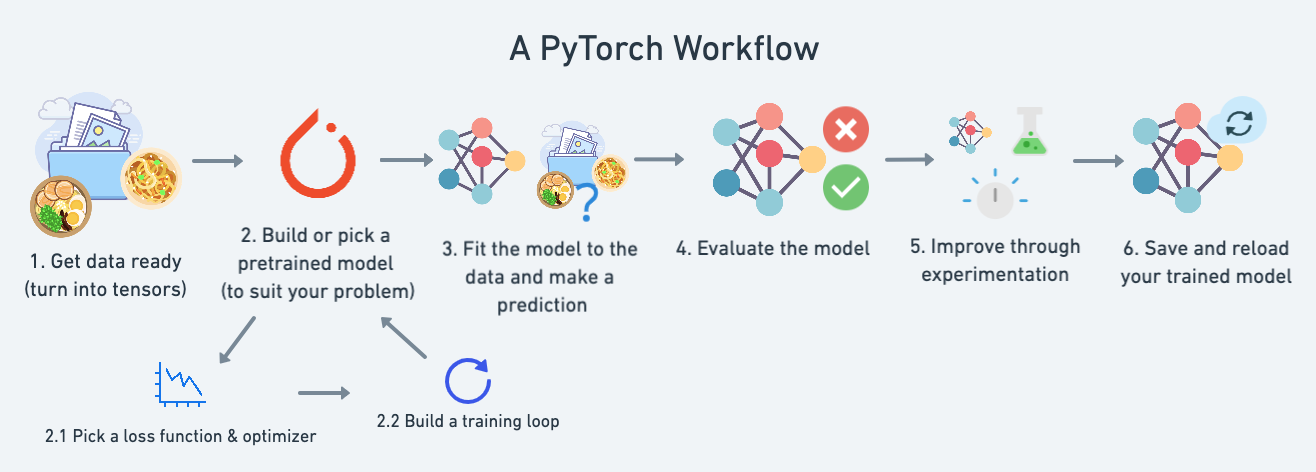

In [1]:
what_were_covering = {1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}

In [2]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.2.1+cu121'

## 1. Data (preparing and loading)

Data can be almost anything in machine learning.

* Excel spreadsheet
* Images of any kind
* Videos
* Audio
* DNA
* Text

Machine learning is a game of two parts:

1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this let's create some *known* data using the linear regression formula.

We'll use a linear regressui formula to make a straight line with *known* **parameters**

In [3]:
# Create *know* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets (one of the most important concepts in machine learning in general)

Let's create a training and test set with our data


In [5]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

how might we better visualize our data?

This is where the data explorer's motto comes in!

"Visualize, Visualize, Visualize!'

In [6]:
def plot_predictions(train_data= X_train,
                     train_labels= y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):

  """
  Plots training data, test data and compares predictions
  """
  plt.figure(figsize=(10,7))

  #Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label = "Training data")

  plt.scatter(test_data, test_labels, c="g", s=4, label = "Testing data")

  # Are there predictions?
  if predictions is not None:
    #Plot the prediction if they exist
    plt.scatter(test_data, predictions, c='r', s=4, label = "Predictions")

    # Show the legend
  plt.legend(prop={"size": 14});

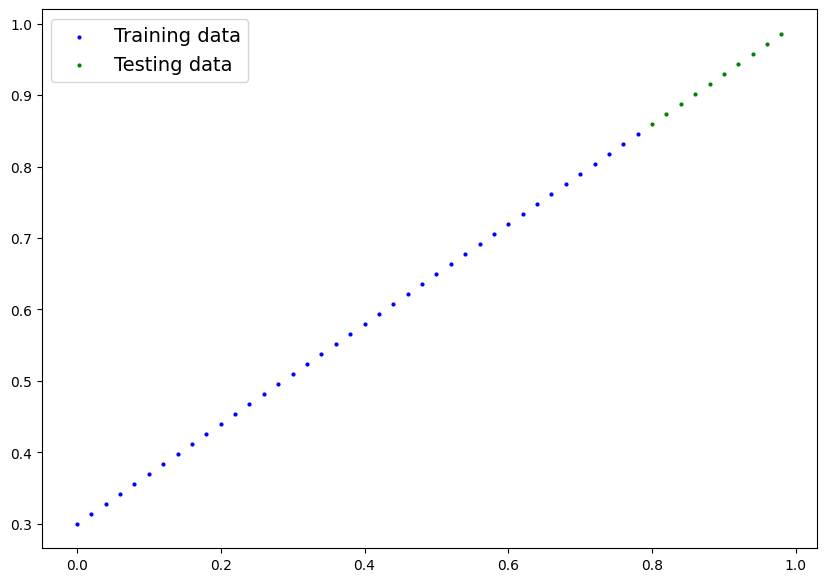

In [7]:
plot_predictions();

## 2. Build model

Our first PyTorch model!

This is very exciting... let's do it!

because we're going to be building classes throught the course, I'd recommend getting familiar with OOP in Python

What our model does:

* Start with random values (weight and bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight and bias values we used to create the data)

How does it do so?

Through two main algorithms:
1. Grandient Descent
2. Backpropagation

In [8]:
# Create a linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch inherits from nn.module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

    #Forward method to define the computation in the model
  def forward(self,x:torch.float) -> torch.Tensor: #<- "x" is the input data
    return self.weights * x + self.bias # this is the linear regression formula


### PyTorch model building essentials

* torch.nn - contains all of the buildings for computational graphs (a neural network can be considered a computation graph)
* torch.nn.parameter - what parameters should our model try and learn, often a pytorch layer from torch.nn will set these for us
* torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim - this is where the optmizers in PyTorch live, they will help with gradient descent
* def forward() - All nn.Module subclasses require you to overwrite forward, this method defines what happens in the forward computation

### Checkin the contents of our PyTorch model

Now we've created a model, let's see what's inside...

So we can check our model parameters or what's inside our model using `.parameters()`

In [9]:
# Create a random seed
torch.manual_seed(42)

# create an intance of the model (this is a subclass of nn.Module)

model_0 = LinearRegressionModel()

#Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
# list name parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predictions using `torch.inferense_mode()`

to check our model's predictive power, let's see how well it predicts `y_test` based on `x_test`.

When we pass data through our model, it's going to run it through the `forward()` methods

In [11]:
# Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [12]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

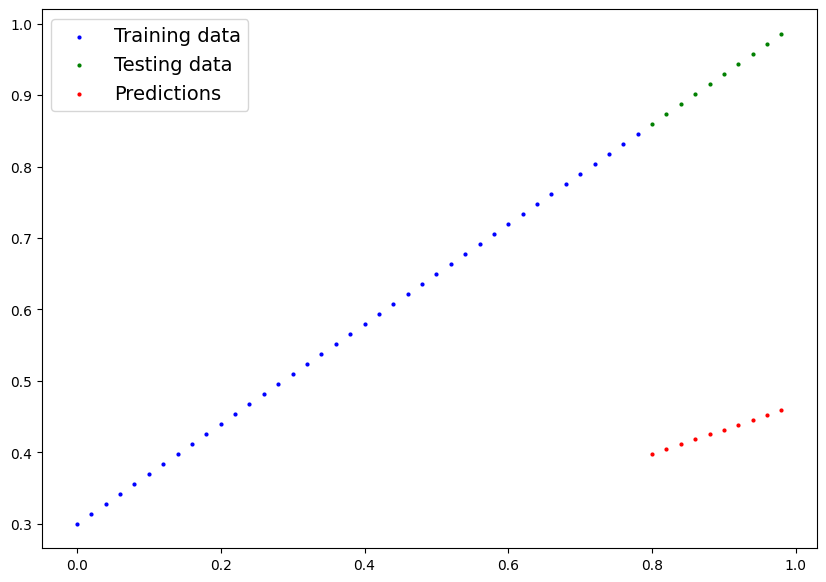

In [13]:
plot_predictions(predictions=y_preds)

# 3. Train model

The whole idea of training is for a model to move from some *unknown* parameters ( these may be random) to some known parameters

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your model predictions are is to use a loss function.

* Note: Loss function may also be called cost function or criterion in different areas. For our case, se're going to refer to it as a loss function.

Things we need to train:

* **Loss Function** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.

* **Optimizer** Takes into account the loss of a model and adjusts the model's paameters (e.g. weights and bias) in our case to improve the loss function.
  * Inside the optmizer you'll often have to set two parameters:
    
    * `params` - the model parameters you'd like to optimize, for example `params = model_0.parameters()`
    * `lr` (learning rate) the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each step (a small `lr` results in small changes, a large `lr` results in large changes)

And specifically for PyTorch, we need:

* A training loop
* A testing loop



In [14]:
# Check out our model's paramters ( aparameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [15]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr=0.01) #lr - learning rate possibly the most important hyperparameter

**Q**: Which loss function and optmizer should i use?
**A**: This will be problem specific. But with experience, you'll get an idea of what works and what doesn't with your particular problem set.

For example, for a regression problem (ike ours), loss function of `nn.L1Loss()` and an optimizer like `torch.optim.sgd()` will suffice.

But for a classification problem like classifying wheter a photo is of a dog or a cat, you'll likely want to use a loss function of `nn.BCELoss()` (binary cross entropy loss).



### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:
0. Loop through the data and do...
1. Forward pass (this involves data moving through our model's `forward` functions) to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)


In [16]:
#An epoch is one loop through the data... (this is a hyperparameters because we've set it)
epochs = 200
# Track different values
epoch_count = []
loss_values = []
test_loss_values = []
### Training
#0. Loop through the data
for epoch in range(epochs):
  # set the model to training mode
  model_0.train() # Train mode in PyTorch sets all parameters that do not require gradients to require gradients
  # 1. Forward pass
  y_pred = model_0(X_train)
  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)
  #print(f"Loss: {loss}")
  # 3. Optimizer zero grad
  optimizer.zero_grad()
  # 4. perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()
  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will accumulate through the loop so... we have to zero them above in step 3

  ### Testing
  model_0.eval() #turns off different settings in the model not needed fot evaluation/testing (dropout/batch norm layers)
  with torch.inference_mode():
  #with torch.no_grad(): # you may also see toch.no_grad() in olde PyTorch code
    # 1. Do the forward pass
    test_pred = model_0(X_test)
    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0 :
      epoch_count.append(epoch)
      loss_values.append(loss)
      test_loss_values.append(test_loss)
      print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
      # Print out model state parameters
      print(model_0.state_dict())

Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

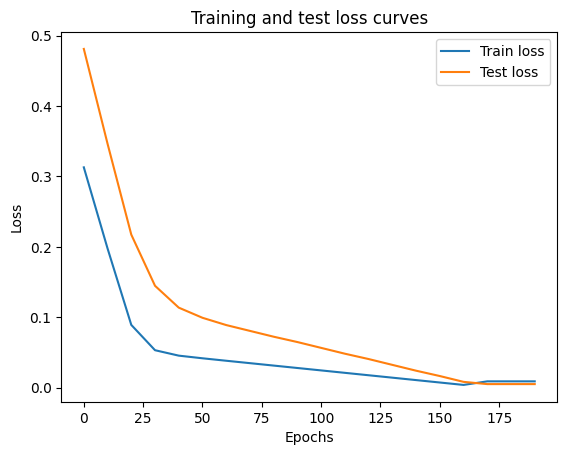

In [17]:
# plot the loss curves
plt.plot(epoch_count, torch.tensor(loss_values).numpy(), label = "Train loss")
plt.plot(epoch_count, test_loss_values, label = "Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [18]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [19]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

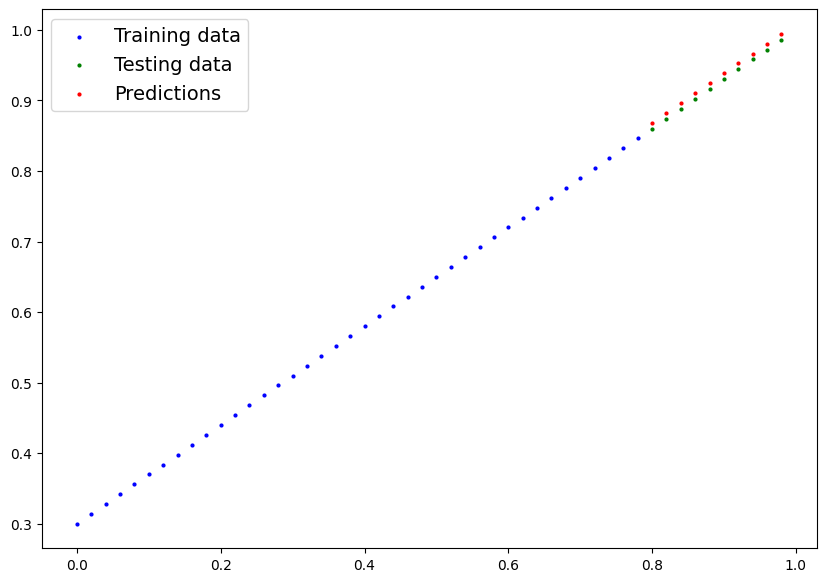

In [20]:
plot_predictions(predictions=y_preds_new)

# 5. Saving and loading a model in PyTorch

There are three main methods you should know about for saving and loading models in PyTorch.

1. `torch.save()` - allows you to save a PyTorch object in Python's pickle format
2. `torch.load()` - allows you to load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - this allows you to load a model's saved state dictionary

In [21]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to : models/01_pytorch_workflow_model_0.pth


In [22]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1680 Apr 16 12:15 01_pytorch_workflow_model_0.pth


### Loading a PyTorch model

Since we saved out model's `state_dict()` rather the entire model, we'll create a new instance of our model class and load the saved `state_dict()` into that.

In [23]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [24]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [25]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [26]:
# make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)
loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [27]:
y_preds_new == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# 6. Putting it all together
Let's go back through the steps above and see it all in one place

In [28]:
# Import PyTorch and matplotlib
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.2.1+cu121'

Create device-agnostic code.

This means if we've got access to a GPU, our code will use it (for potentially faster computing).

If no GPU is available, the code will default to using CPU.

In [29]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


In [30]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


## 6.1 Data

In [31]:
# Create some data using the linear regression formula of y = weight * X + bias
weight = 0.2
bias = 0.1

# Create range values
start = 0
end = 1
step = 0.02
# Create the X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, errors will pop up
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.1000],
         [0.1040],
         [0.1080],
         [0.1120],
         [0.1160],
         [0.1200],
         [0.1240],
         [0.1280],
         [0.1320],
         [0.1360]]))

In [32]:
# split the data
train_split = int(0.8* len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

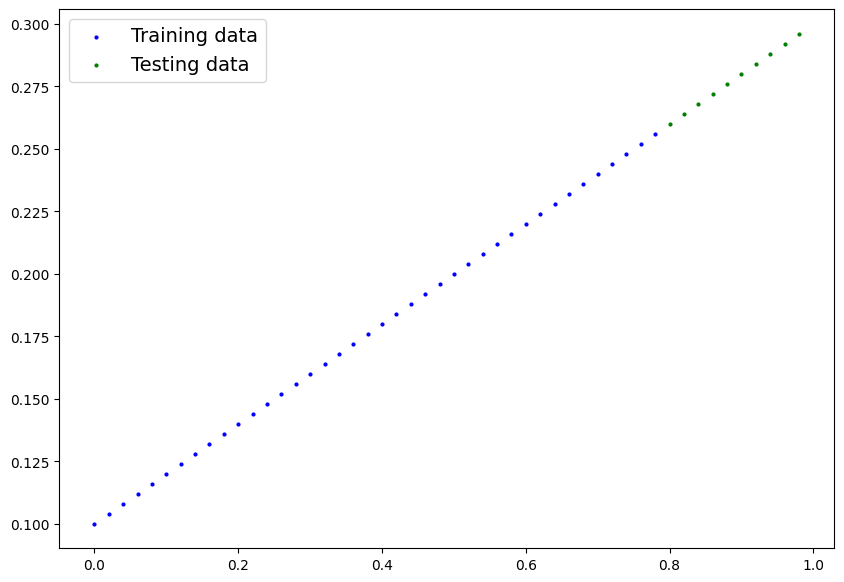

In [33]:
# Plot tha data
# note: if you don't have the plot_predictions() function loaded, this will error
plot_predictions(X_train,y_train, X_test, y_test)

## 6.2 Building a PyTorch linear model

In [34]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [35]:
# Chek the model device
next(model_1.parameters()).device

device(type='cpu')

In [36]:
# Set the model to use the taget device
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

## 6.3 Training
for training we need:
  * Loss function
  * Optimizer
  * Training Loop
  * Testing Loop

In [37]:
#Setup loss function
loss_fn = nn.L1Loss()

# Setup our optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr=0.0025)

In [38]:
# Let's write a training loop
torch.manual_seed(42)

epochs = 1000

# Put data on the target device (device agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  # 1. forward pass
  y_pred = model_1(X_train)

  # 2. calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()

  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  # Print out what's happening

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
  elif epoch == epochs:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")


Epoch: 0 | Loss: 0.9501779675483704 | Test loss: 1.2290794849395752
Epoch: 100 | Loss: 0.6621526479721069 | Test loss: 0.8923035860061646
Epoch: 200 | Loss: 0.37412741780281067 | Test loss: 0.5555276274681091
Epoch: 300 | Loss: 0.08997876942157745 | Test loss: 0.22116458415985107
Epoch: 400 | Loss: 0.04069945961236954 | Test loss: 0.09955122321844101
Epoch: 500 | Loss: 0.032006241381168365 | Test loss: 0.0745803713798523
Epoch: 600 | Loss: 0.023422112688422203 | Test loss: 0.054586827754974365
Epoch: 700 | Loss: 0.01483489852398634 | Test loss: 0.03442148119211197
Epoch: 800 | Loss: 0.006250766105949879 | Test loss: 0.014427393674850464
Epoch: 900 | Loss: 0.0011302182683721185 | Test loss: 0.002701303455978632


In [39]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.2009]])),
             ('linear_layer.bias', tensor([0.0985]))])

In [40]:
weight, bias

(0.2, 0.1)

## 6.4 Making and evaluating predictions

In [41]:
# Turn model into evaluation mode
model_1.eval()

# Make prediction on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[0.2593],
        [0.2633],
        [0.2673],
        [0.2713],
        [0.2753],
        [0.2793],
        [0.2834],
        [0.2874],
        [0.2914],
        [0.2954]])

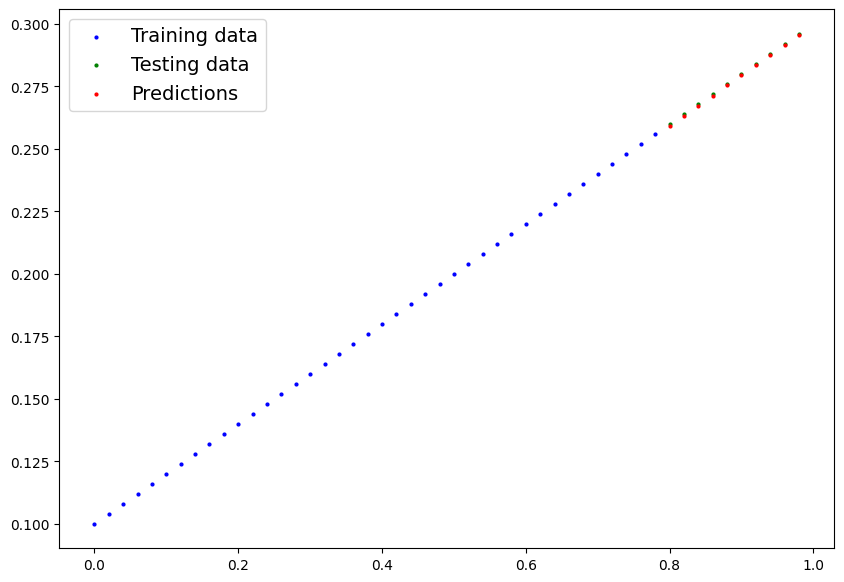

In [42]:
plot_predictions(X_train,y_train, X_test, y_test, predictions=y_preds)

## 6.5 Saving and loading a trained model

In [43]:
from pathlib import Path

# 1. Create models directory

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Sava the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


In [44]:
# load a PyTorch
loaded_model_1 = LinearRegressionModelV2()

# Load the save model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [45]:
# Evaluate the loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
loaded_model_1_preds == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## Exercises & Extra-Curriculum

For exercises and extra curriculum